In [1]:
import pandas as pd
import plotnine as pn

# Plotting functions

In [2]:
def plot_tails(df, x_lab="3' tail length", ylab="# Sequences", title=""):
    '''Plotting tail length'''
    data_ss = df.loc[:,["position","A_tail_sequences","C_tail_sequences","T_tail_sequences","G_tail_sequences"]]
    data_ss.columns = [x.replace("_tail_sequences","") for x in data_ss.columns]
    data_ss_melt = data_ss.melt(id_vars="position")
    data_ss_melt["value"] = data_ss_melt.value + 1
    temp_plot=(pn.ggplot(data=data_ss_melt) +
        pn.geom_line( pn.aes(x="position", y="value", group="variable", color="variable"), size=2) +
        pn.scale_y_continuous(trans="log10", breaks=[1,10,100,1000,10000,100000,1000000, 10000000, 100000000],
                              limits=[1,100000000],
                              labels=["1","10","100","1,000","10,000","100,000","1,000,000", "10,000,000", "100,000,000"],
                             expand=[0,0]) +
        pn.scale_x_continuous(breaks=[0,25,50,75,100,125,151], expand=[.02,.02], limits=[-1,151]) +
        pn.labs(y=ylab, x=x_lab, color="Base") +
        pn.ggtitle(title) +
        pn.theme(
           axis_line_x = pn.element_line(color="black", size=1),
            panel_background = pn.element_rect(fill="white"),
            panel_grid_minor= pn.element_blank(),
            panel_grid_major_y = pn.element_line(color="grey", size=.5),
            panel_grid_major_x = pn.element_blank(),
            axis_text = pn.element_text(color="black", size=10),
            axis_title = pn.element_text(color="black", size=12),
            axis_ticks_major_y = pn.element_blank(),
            axis_ticks_length_major=5,
            legend_key = pn.element_blank()
            )
        )
    return(temp_plot)

def plot_base_content(df, x_lab="# Bases per read", ylab="# Sequences", title=""):
    '''Plotting total base content of each read'''
    data_ss = df.loc[:,["position","A_total_sequences","C_total_sequences","T_total_sequences","G_total_sequences"]]
    data_ss.columns = [x.replace("_total_sequences","") for x in data_ss.columns]
    data_ss_melt = data_ss.melt(id_vars="position")
    data_ss_melt["value"] = data_ss_melt.value + 1
    temp_plot=(pn.ggplot(data=data_ss_melt) +
        pn.geom_line( pn.aes(x="position", y="value", group="variable", color="variable"), size=2) +
        pn.scale_y_continuous(trans="log10", breaks=[1,10,100,1000,10000,100000,1000000, 10000000, 100000000],
                              limits=[1,100000000],
                              labels=["1","10","100","1,000","10,000","100,000","1,000,000", "10,000,000", "100,000,000"],
                             expand=[0,0]) +
        pn.scale_x_continuous(breaks=[0,25,50,75,100,125,150], expand=[.02,.02], limits=[0,150]) +
        pn.labs(y=ylab, x=x_lab, color="Base") +
        pn.ggtitle(title) +
        pn.theme(
           axis_line_x = pn.element_line(color="black", size=1),
            panel_background = pn.element_rect(fill="white"),
            panel_grid_minor= pn.element_blank(),
            panel_grid_major_y = pn.element_line(color="grey", size=.5),
            panel_grid_major_x = pn.element_blank(),
            axis_text = pn.element_text(color="black", size=10),
            axis_title = pn.element_text(color="black", size=12),
            axis_ticks_major_y = pn.element_blank(),
            axis_ticks_length_major=5,
            legend_key = pn.element_blank()
            )
        )
    return(temp_plot)

def plot_base_content_by_position(df, x_lab="Position (bp)", ylab="Base content", title=""):
    '''Plotting base content by position'''
    data_ss = df.loc[:,["position","A_pct_content","C_pct_content","T_pct_content","G_pct_content"]]
    data_ss.columns = [x.replace("_pct_content","") for x in data_ss.columns]
    data_ss_melt = data_ss.melt(id_vars="position")
    temp_plot=(pn.ggplot(data=data_ss_melt) +
        pn.geom_line( pn.aes(x="position", y="value", group="variable", color="variable"), size=2) +
        pn.scale_y_continuous(breaks=[0,.25,.5,.75,1],
                              limits=[0,1],
                              labels=["0","25%", "50%", "75%", "100%"],
                             expand=[0,0]) +
        pn.scale_x_continuous(breaks=[0,25,50,75,100,125,150], expand=[.02,.02], limits=[0,150]) +
        pn.labs(y=ylab, x=x_lab, color="Base") +
        pn.ggtitle(title) +
        pn.theme(
           axis_line_x = pn.element_line(color="black", size=1),
            panel_background = pn.element_rect(fill="white"),
            panel_grid_minor= pn.element_blank(),
            panel_grid_major_y = pn.element_line(color="grey", size=.5),
            panel_grid_major_x = pn.element_blank(),
            axis_text = pn.element_text(color="black", size=10),
            axis_title = pn.element_text(color="black", size=12),
            axis_ticks_major_y = pn.element_blank(),
            axis_ticks_length_major=5,
            legend_key = pn.element_blank()
            )
        )
    return(temp_plot)

## Load data

In [70]:
#Load in dataframe output from analyze_seqs.py
input_dataframe_path = "test_small_files/R1_stats.tsv"
df = pd.read_csv(input_dataframe_path, sep='\t')

## Make plots

In [71]:
tail_plot = plot_tails(df)
base_content_plot = plot_base_content(df)
base_content_by_position_plot = plot_base_content_by_position(df)

## View plots

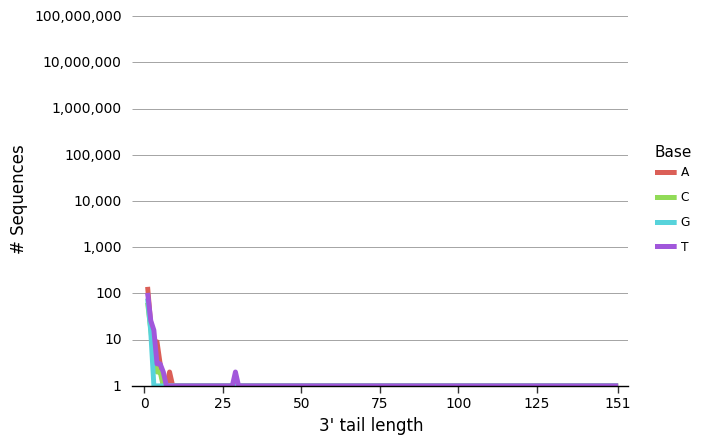

<ggplot: (8767142350613)>

In [72]:
tail_plot

/home/swandro/miniconda3/envs/biopython/lib/python3.7/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 1 rows containing missing values.
  warn(msg.format(n1-n2), PlotnineWarning)


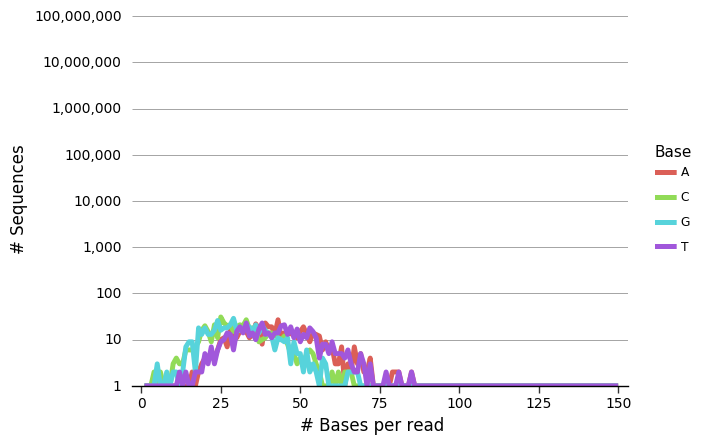

<ggplot: (8767142398049)>

In [73]:
base_content_plot

/home/swandro/miniconda3/envs/biopython/lib/python3.7/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 1 rows containing missing values.
  warn(msg.format(n1-n2), PlotnineWarning)


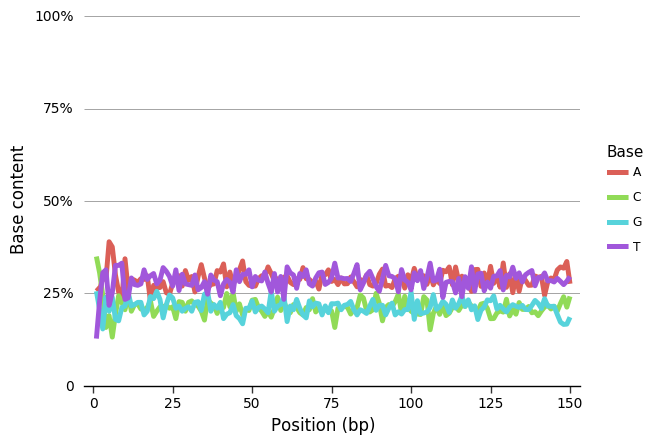

<ggplot: (8767142401417)>

In [74]:
base_content_by_position_plot

## Save plots

In [ ]:
output_plot_folder = "/path/to/folder/"
output_plot_root_name =  output_plot_folder + "raw_R1"

tail_plot.save( output_plot_root_name + "_tail_plot.png" )
base_content_plot.save( output_plot_root_name + "_base_content_plot.png" )
base_content_by_position_plot.save( output_plot_root_name + "_base_content_by_position_plot.png" )